In [75]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [76]:
photo = cv2.imread('sample-photos/old_photo_16.jpg')
#photo = cv2.imread('sample-photos/old_photo_01.jpg')

In [77]:
def show_image(title, img_bgr):
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(6, 4))
    plt.title(title)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

MASKING AND INPAINT 

In [ ]:
def needs_masking(photo):
    grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(grey, 110, 160)
    damaged_pixels = cv2.countNonZero(mask)
        
    return damaged_pixels > 50  


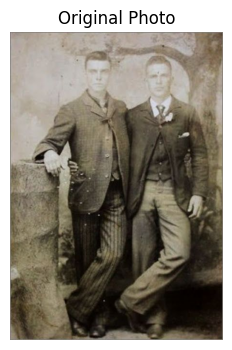

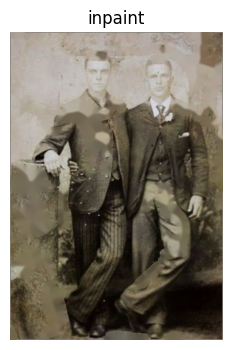

In [79]:
def masking(photo):
    grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)

    mask_mid = cv2.inRange(grey, 110, 160) 
    
    kernel = np.ones((5,5), np.uint8)
    mask_mid = cv2.morphologyEx(mask_mid, cv2.MORPH_OPEN, kernel)
    mask_mid = cv2.morphologyEx(mask_mid, cv2.MORPH_CLOSE, kernel)

    mask_small = cv2.morphologyEx(mask_mid, cv2.MORPH_OPEN, np.ones((9,9), np.uint8))
    _, damage_mask = cv2.threshold(mask_small, 127, 255, cv2.THRESH_BINARY)


    restored = cv2.inpaint(photo, damage_mask, 5, cv2.INPAINT_TELEA)

    return damage_mask, restored
show_image("Original Photo", photo)
show_image("inpaint", masking(photo)[1])


GAUSSIAN 

In [80]:
def needs_gaussian(photo, threshold=200):
    grey = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
    noise_estimate = cv2.Laplacian(grey, cv2.CV_64F).var()
    return noise_estimate > threshold


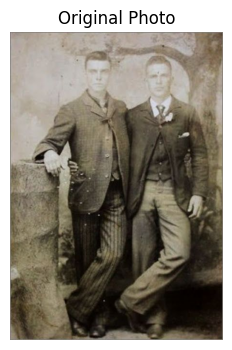

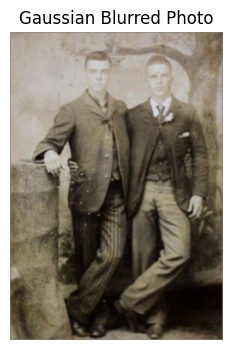

In [ ]:
#denoising before thresholding or masking.
def gaussian(photo, ksize=5, sigma=1.0):
    blurred = cv2.GaussianBlur(photo, (ksize, ksize), sigma)
    return blurred
show_image("Original Photo", photo)
show_image("Gaussian Blurred Photo", gaussian(photo, ksize=5, sigma=1.0))


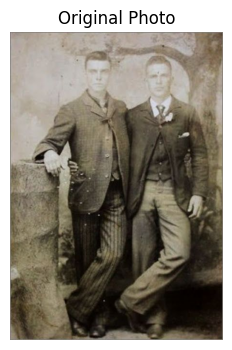

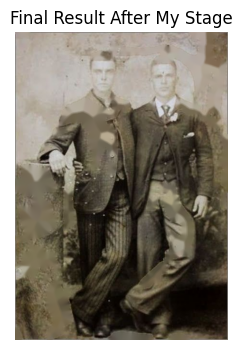

In [ ]:
def run_my_part(photo):
    output = photo.copy()

    #check for noise
    if needs_gaussian(output):
        output = gaussian(output)

    #check for damage
    if needs_masking(output):
        mask, output = masking(output)

    return output
result = run_my_part(photo)
show_image("Original Photo", photo)
show_image("Final Result After My part", result)
